# Everyday Object Image Classification using Convolutional Neural Networks

We have got 96.8% accuracy by training a feed-forward neural network with a single hidden layer to classify handwritten digits earlier. Here, we will use the CIFAR10 dataset which has 60,000 32x32 px colour images in 10 classes.

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
project_name='05-cifar10-cnn'

In [3]:
#downloading the dataset
dataset_url="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,'.')

Using downloaded and verified file: ./cifar10.tgz


In [4]:
#extracting
with tarfile.open('./cifar10.tgz','r:gz') as tar:
    tar.extractall(path='./data')

Our dataset is extracted to data/cifar10. There are two folders train and test, which contains 50,000 and 10,000 images respectively. Let us use os.listdir to verify.

In [5]:
data_dir='./data/cifar10'
print(os.listdir(data_dir))
classes=os.listdir(data_dir+"/train")
print(classes)

['test', 'train']
['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']


We will use ImageFolder class from torchvision to load the data as PyTorch tensors.

In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [7]:
dataset=ImageFolder(data_dir+'/train',transform=ToTensor())

We will look at a sample element from the training dataset. Each element is a tuple, with an image tensor and a label.

The data is 32x32 px colour images with 3 channels RGB and so each image tensor has the shape (3,32,32)

In [8]:
img,label=dataset[0]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [9]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


To view the image we can use matplotlib but we will have to change the tensor to (32,32,3)

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor']='#ffffff'

In [11]:
def show_example_image(img,label):
    print('Label: ',dataset.classes[label],"("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Label:  airplane (0)


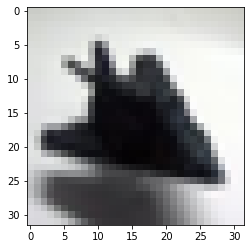

In [12]:
show_example_image(*dataset[0])

Label:  airplane (0)


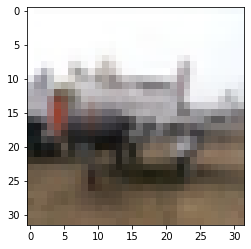

In [13]:
show_example_image(*dataset[1000])

In [14]:
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/05-cifar10-cnn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/nehamalcom/05-cifar10-cnn


'https://jovian.ai/nehamalcom/05-cifar10-cnn'

## Training and Validation Datasets

Dataset can be split into 3 parts:
    1. Training set to train the model which means to compute loss and adjust the weights of the model.
    2. Validation set to evaluate the model while training and adjust the hyperparameters
    3. Test set to compare different models and report final accuracy
    
    
We will set aside 5000 images of training set as validation set using random_split method from PyTorch. We set a seed to ensure that we always get the same validation set.

In [15]:
random_seed=38
torch.manual_seed(random_seed);

In [16]:
val_size=5000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(45000, 5000)

In [17]:
jovian.log_dataset(dataset_url=dataset_url,val_size=val_size,random_seed=random_seed)

[jovian] Dataset logged.


In [18]:
#creating data loaders
from torch.utils.data.dataloader import DataLoader
batch_size=128
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_dl=DataLoader(val_ds,batch_size*2,shuffle=True,num_workers=4,pin_memory=True)

In [19]:
#viewing batches of random data in grid
from torchvision.utils import make_grid
def show_batch(dl):
    for images,labels in dl:
        fig,ax=plt.subplots(figsize=(12,6))
        ax.set_xticks([]);ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break

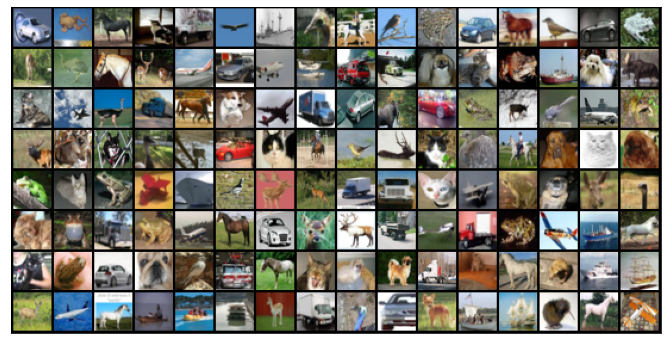

In [20]:
show_batch(train_dl)

In [21]:
jovian.commit(project=project_name,environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/05-cifar10-cnn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/nehamalcom/05-cifar10-cnn


'https://jovian.ai/nehamalcom/05-cifar10-cnn'

## Defining the Model (CNN: Convolutional Neural Network)

We will use the nn.Conv2d class from PyTorch. 2D convolution basically has a kernel which is a matrix of weights with dimension smaller than that of the 2D input data, which will perform element wise multiplication over the input data by sliding over it and summing the results into a single output pixel.

For multi-channel images, a different kernel is applied to each channel and the output is added pixel-wise.

Advantages of convolutional layers with image data are:
- Fewer parameters
- Sparsity of connections making forward and backward passes more efficient
- Parameter sharing and spatial invariance

We are also using max-poolig layers to decrease the height and width of the output tensors from each convolutional grid.

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
simple_model=nn.Sequential(
nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),nn.MaxPool2d(2,2))

**Padding** consists in adding a few pixels on each or a few sides of the picture with a zero value. This means we can have the output in the same dimension as the input.
- dixdi (dimensions of input)
- dkxdk (dimensions of kernel)
- doxdo (dimensions of output)
- --> do = di - dk + 1 

**Stride** is like a by in a for loop, instead of going through every window one after the other, we skip a given amount each time.

In [24]:
for images,labels in train_dl:
    print('images.shape:',images.shape)
    out=simple_model(images)
    print('out.shape:',out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


The Conv2d layer transforms a 3-channel image to a 16-channel feature map and MaxPool2d layer halves the height and width. We add more layers so that feature map gets smaller which can then be flattened to get a vector of size 10.

In [25]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [26]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(256*4*4,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    def forward(self,xb):
        return self.network(xb)

In [27]:
model=Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [28]:
for images,labels in train_dl:
    print('images.shape:',images.shape)
    out=model(images)
    print('out.shape',out.shape)
    print('out[0]:',out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape torch.Size([128, 10])
out[0]: tensor([-0.0057, -0.0489, -0.0002, -0.0351,  0.0035, -0.0459,  0.0208,  0.0115,
         0.0378,  0.0459], grad_fn=<SelectBackward>)


In [29]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)

class DeviceDataLoader():
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    def __iter__(self):
        for b in self.dl:
            yield to_device(b,self.device)
    def __len__(self):
        return len(self.dl)

In [30]:
device=get_default_device()
train_dl=DeviceDataLoader(train_dl,device)
val_dl=DeviceDataLoader(val_dl,device)
to_device(model,device);

In [31]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/05-cifar10-cnn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/nehamalcom/05-cifar10-cnn


'https://jovian.ai/nehamalcom/05-cifar10-cnn'

## Training the Model

In [40]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [41]:
model=to_device(Cifar10CnnModel(),device)

In [42]:
evaluate(model,val_dl)

{'val_loss': 2.302361488342285, 'val_acc': 0.1064453125}

In [43]:
num_epochs=10
opt_func=torch.optim.Adam
lr=0.001

In [44]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [45]:
history=fit(num_epochs,lr,model,train_dl,val_dl,opt_func)

Epoch [0], train_loss: 1.9536, val_loss: 1.5864, val_acc: 0.4053
Epoch [1], train_loss: 1.4079, val_loss: 1.3091, val_acc: 0.5259
Epoch [2], train_loss: 1.1248, val_loss: 0.9958, val_acc: 0.6320
Epoch [3], train_loss: 0.9047, val_loss: 0.8406, val_acc: 0.7060
Epoch [4], train_loss: 0.7679, val_loss: 0.7849, val_acc: 0.7193
Epoch [5], train_loss: 0.6578, val_loss: 0.7707, val_acc: 0.7345
Epoch [6], train_loss: 0.5712, val_loss: 0.7104, val_acc: 0.7570
Epoch [7], train_loss: 0.4807, val_loss: 0.7181, val_acc: 0.7599
Epoch [8], train_loss: 0.4145, val_loss: 0.8095, val_acc: 0.7480
Epoch [9], train_loss: 0.3326, val_loss: 0.7858, val_acc: 0.7602


In [46]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


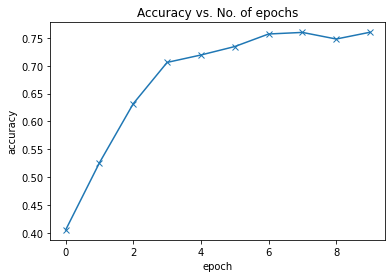

In [47]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

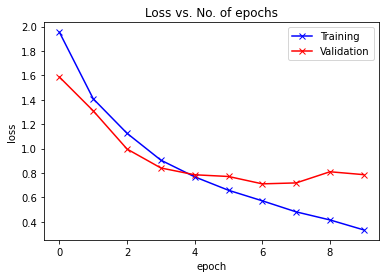

In [48]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
plot_losses(history)

In [49]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/05-cifar10-cnn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/nehamalcom/05-cifar10-cnn


'https://jovian.ai/nehamalcom/05-cifar10-cnn'

By looking at the graphs, we see that our model reaches an accuracy of around 75% and that it may not reach higher than 80% even after a long time. This means we need a more powerful model. This can be done by adding more convolution layers to the model or increasing number of channels in each convolutional layer or by using regularization techniques.

By looking at the training and validation loss graph we see this.

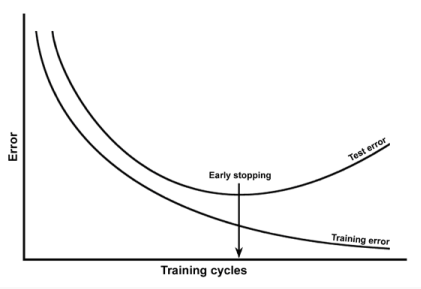

This is because of **overfitting**.
Some strategies to avoid overfitting are:
 - gathering and generating more training data or adding noise to it
 - using regularization techniques like batch normalization and dropout
 - early stopping of model's training when validation loss starts increasing

In [50]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/05-cifar10-cnn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/nehamalcom/05-cifar10-cnn


'https://jovian.ai/nehamalcom/05-cifar10-cnn'

## Testing images

In [51]:
test_dataset=ImageFolder(data_dir+'/test',transform=ToTensor())

In [52]:
def predict_image(img,model):
    xb=to_device(img.unsqueeze(0),device)
    yb=model(xb)
    _,preds=torch.max(yb,dim=1)
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: bird


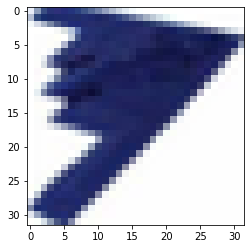

In [53]:
img,label=test_dataset[848]
plt.imshow(img.permute(1,2,0))
print('Label:',dataset.classes[label],', Predicted:',predict_image(img,model))

Label: airplane , Predicted: airplane


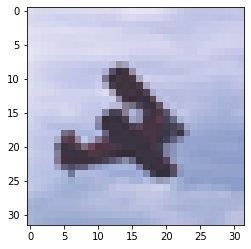

In [54]:
img,label=test_dataset[38]
plt.imshow(img.permute(1,2,0))
print('Label:',dataset.classes[label],', Predicted:',predict_image(img,model))

In [55]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.7942997217178345, 'val_acc': 0.759472668170929}

In [56]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [57]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [58]:
model2 = to_device(Cifar10CnnModel(), device)

In [59]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [60]:
evaluate(model2, test_loader)

{'val_loss': 0.7942997217178345, 'val_acc': 0.759472668170929}